In [1]:
# data: Salary_Data.csv
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
df.shape

(30, 2)

In [8]:
import warnings
warnings.filterwarnings('ignore')

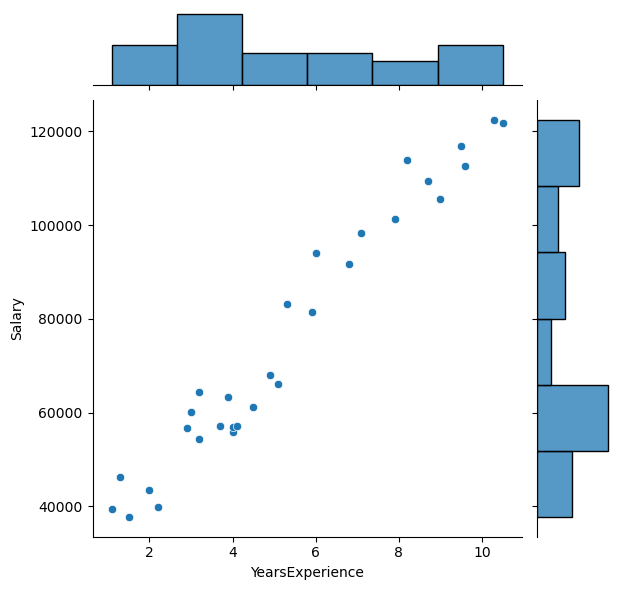

In [9]:
sns.jointplot(x = df['YearsExperience'],y = df['Salary']);

In [10]:
# separate input and output

x = df['YearsExperience'].values      # input data

y = df['Salary']

In [14]:
x = x.reshape(30,1)

In [15]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### Cross Validation

In [16]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [34]:
x_train.shape

(22, 1)

In [35]:
y_train.shape

(22,)

In [36]:
x_test.shape

(8, 1)

In [37]:
y_test.shape

(8,)

### Build the model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(x_train, y_train)

LinearRegression()

### predict on test data

In [41]:
y_pred = regressor.predict(x_test)

In [42]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [43]:
compare = pd.DataFrame({
    'predicted': y_pred,
    'actual': y_test
})
compare

,predicted,actual
2,41056.257055,37731.0
28,123597.709384,122391.0
13,65443.504334,57081.0
10,63567.562235,63218.0
26,116093.940990,116969.0
24,108590.172597,109431.0
27,117031.912039,112635.0
11,64505.533285,55794.0


In [44]:
# mean absolute error

sum(abs(y_pred - y_test) / len(y_pred))

3508.5455930660555

In [46]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [47]:
# actual accuracy / r2_score

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9779208335417602

### Best Fit line

In [49]:
wholedata_pred = regressor.predict(x)

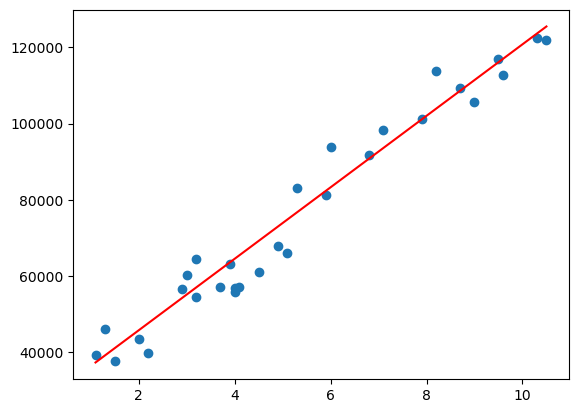

In [50]:
plt.scatter(x, y, marker = 'o');
plt.plot(x, wholedata_pred, color = 'r');

In [51]:
regressor.score(x, y)

0.955975487542377